# 단순 선형 회구(Linear Regression)

## 아버지와 아들의 키 - Galton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt',
 sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


## 아버지와 아들의 키만 발췌

In [4]:
df = df[df.Gender == 'M']
height = df[['Father', 'Height']].rename(columns={
    'Height': 'Son'
})
# inch to centimeter
height.Father = height.Father * 2.54
height.Son = height.Son * 2.54
height.describe()

,Father,Son
count,465.000000,465.000000
mean,175.687157,175.841196
std,5.841820,6.684249
min,157.480000,152.400000
25%,172.720000,171.450000
50%,175.260000,175.768000
75%,179.070000,180.340000
max,199.390000,200.660000


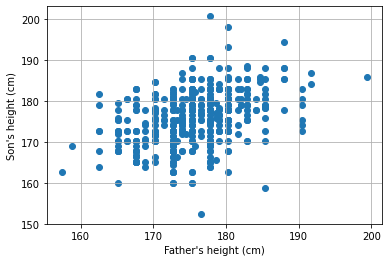

In [5]:
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")

plt.grid()
plt.show()

## Numpy를 이용한 회귀선

In [6]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [7]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [8]:
# 기울기와 절편
m, c = reg[0]

In [9]:
# 전차 제곱의 합
rss = reg[1][0]

In [10]:
print(f"기울기: {m:.4f}, 절편: {c:.4f}, 잔차제곱:{rss:.4f}")

기울기: 0.4477, 절편: 97.1776, 잔차제곱:17556.5995


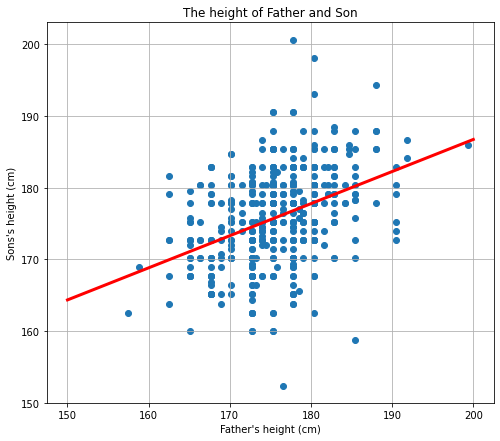

In [11]:
plt.figure(figsize=(8,7))
plt.scatter(height.Father, height.Son)
plt.plot([150, 200], [m*150+c, m*200+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("Sons's height (cm)")
plt.grid()
plt.show()

## Scikit-Learn 이용한 회귀선 

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# 1차원인 데이터를 2차원으로 변환
X = height.Father.values.reshape(-1, 1)
y = height.Son.values

In [14]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [15]:
# 결과치 확인
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [16]:
# W: weight, b: bias
# y = ax + b => y = WX + b
weight, bias = lr.coef_, lr.intercept_ #coefficient, interceept
rss = lr._residues
print(f"기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱:{rss:.4f}")

기울기: 0.4477, 절편: 97.1776, 잔차제곱:17556.5995


In [17]:
# 정확도: 회귀선이 데이터분포를 잘 표현한 정도
# 0 < (r2_score, R_squared) < 1
score = lr.score(X, y)
print('R_squared: {:.4f}'.format(score))

R_squared: 0.1531


## 당뇨별 데이터셋

In [18]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [19]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [20]:
X = diabetes.data[:, 2]
y = diabetes.target
X.shape

(442,)

In [21]:
# 형변환: 442개의 데이터를 하나의 변수만 사용하겠다
X = diabetes.data[:, 2].reshape(-1, 1)
y = diabetes.target
X.shape

(442, 1)

In [22]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [23]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
print(f"기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.4f}")

기울기: 949.4353, 절편: 152.1335, 잔차제곱: 1719581.8108


## 훈련/테스트 데이터셋 분리 후 학습/예측/평가

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=2021
)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) # mse 값에 루트를 씌우기
print(f"Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}")

Mean Squared Error: 3470.1713, RMSE: 58.9082


In [28]:
score = r2_score(y_test, pred)
print(f"R_squared: {score:.4f}")

R_squared: 0.0939


## 그래프로 확인

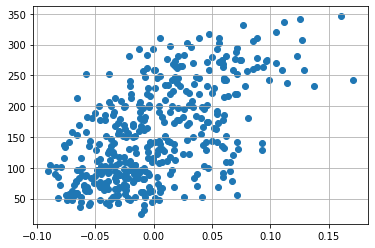

In [29]:
plt.scatter(X_train, y_train)
plt.grid()
plt.show()

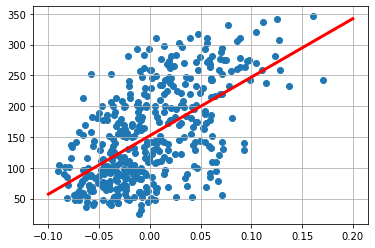

In [30]:
plt.scatter(X_train, y_train)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

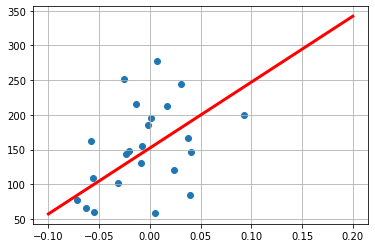

In [31]:
plt.scatter(X_test, y_test)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

## 당뇨병 VS BP

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:, 3], y, test_size=0.05, random_state=2021
)

In [33]:
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f"")
score = r2_score(y_test, pred)
print(f"")

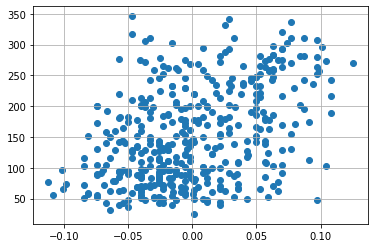

In [36]:
weight, bias = lr.coef_, lr.intercept_
plt.scatter(X_train, y_train)
plt.grid()
plt.show()

## 회귀 표본 만들기

In [44]:
from sklearn.datasets import make_regression

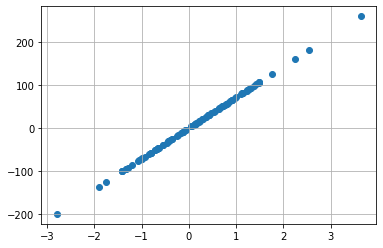

In [48]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_targets=1,
    random_state=2021
)

plt.scatter(X, y)
plt.grid()
plt.show()

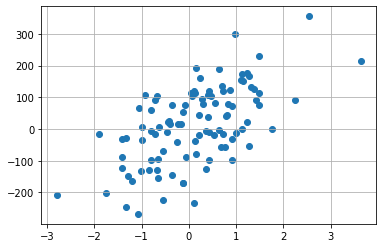

In [49]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_targets=1,
    noise=100,
    random_state=2021
)

plt.scatter(X, y)
plt.grid()
plt.show()

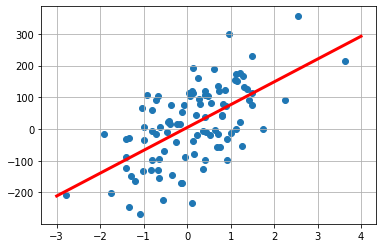

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

weight, bias = lr.coef_, lr.intercept_ #coefficient, interceept

plt.scatter(X, y)
plt.plot([-3, 4], [-3*weight+bias, 4*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

In [51]:
lr.score(X, y)

0.3644244725778779